In [36]:
import matplotlib.pyplot as plt
import numpy as np

**Exercise 13.1.**  Filling a multidimensional space requires exponentially more points as the number of dimensions increases. To help build this intuition, determine the side lengths of an $n$-dimensional hypercube such that it fills half of the volume of the $n$-dimensional unit hypercube.

**Answer.**  Any unit hypercube has volume 1. So we we have volume $1/2$ when the side length is the volume would be $l^n = \frac{1}{2}$, so $l = 2^{-1/n}$.

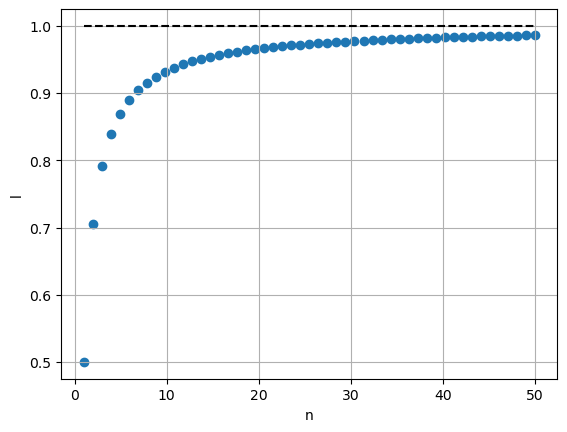

In [37]:
n = np.linspace(1, 50, 50+1)

def f(n):
    return 2**(-1/n)

plt.hlines(1, 1, 50, colors='k', linestyles='dashed')
plt.scatter(n, f(n))
plt.grid()
plt.ylabel('l')
plt.xlabel('n')
plt.show()

**Exercise 13.2.**  Suppose that you sample randomly inside a unit sphere in $n$ dimensions. Compute the probability that a randomly sampled point is within $\epsilon$ distance from the surface of the sphere as $n \rightarrow \infty$. Hint: The volume of a sphere is $C(n) r^n$, where $r$ is the radius and $C(n)$ is a function of the dimension $n$ only.


**Answer.**  The volume of a hypershere is:

$$
V_n = \frac{\pi^{n/2}}{\Gamma(n/2 + 1)} r^n
$$

where $\Gamma$ is the gamma function and $r$ is the radius, which is 1 in this case. We can plot as a function of $n$:

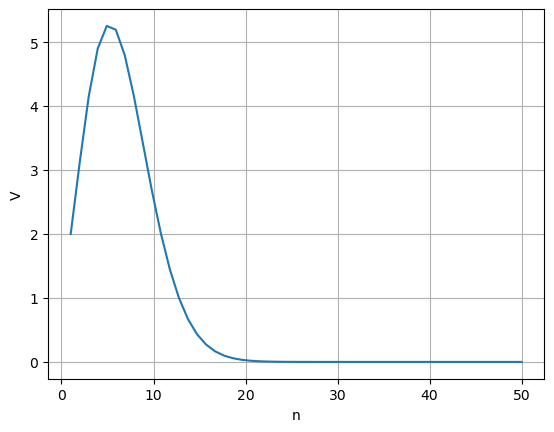

In [38]:
# plot unit hypersphere as a function of n

n = np.linspace(1, 50, 50+1)
V = [np.pi**(ni/2)/np.math.gamma(ni/2+1) for ni in n]

plt.plot(n, V)
plt.grid()
plt.ylabel('V')
plt.xlabel('n')
plt.show()

As we can see the volume of the hypersphere decreases as the number of dimensions increases. So the probability of a point falling in the hypersphere decreases as the number of dimensions increases.

**Exercise 13.3.**  Suppose we have a sampling plan $X=\{x^{(1)}, \ldots, x^{(10)}\}$, where

$$
x^{(i)} = [\cos(2\pi i/10),\sin(2\pi i/10)]^\top
$$

Compute the Morris-Mitchell criterion for $X$ using a $L_2$ norm when the parameter $q$ is set to 2. In other words, evaluate $\Phi_2(X)$. If we add $[2, 3]$ to each $x^{(i)}$, will $\Phi_2(X)$ change? Why or why not?

In [39]:
def morris_mitchell_criterion(X, q=2,l=2):
    n = len(X)
    dist = np.array([np.linalg.norm(X[i]-X[j],l) for i in range(n-1) for j in range(i+1,n)])
    return np.sum(dist**(-q))**(1/q)

X = np.array([[np.cos(2 * np.pi * i / 10), np.sin(2 * np.pi * i / 10)] for i in range(1, 11)])

phi_2_X = morris_mitchell_criterion(X)
print(f"Phi_2(X): {phi_2_X}")

Phi_2(X): 6.422616289332565


In [40]:
X_modified = X + np.array([2, 3])

# Calculate the Morris-Mitchell criterion for the modified X
phi_2_X_modified = morris_mitchell_criterion(X_modified)
print(f"Phi_2(X_modified): {phi_2_X_modified}")

Phi_2(X_modified): 6.422616289332565


This is the same as expected since if we shift all points by a constant, the distances between points will not change.

**Exercise 13.4.**  Additive recurrence requires that the multiplicative factor $c$ in equation (13.7) be irrational. Why can $c$ not be rational?

**Answer.**  If $c$ is rational it can be written as $c = p/q$ for some integers $p$ and $q$.
The recurrence relation becomes:

$$
\begin{align}
x_{n+1} &=  x_n + (p/q) \mod 1\\
x_{n} &=  x_0 + n (p/q) \mod 1\\
x_{n} &=  x_0 + n (p/q) + n \mod 1 \quad\text{since we have mod 1 we can add an extra } n\\
x_{n} &=  x_0 + (n+q) (p/q) \mod 1 \\
x_{n} &=  x_{n+q}
\end{align}
$$

After $q$ steps we are back to the original point. So the sequence is periodic with period $q$.